In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [3]:
mean_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [4]:
mean_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_vec2,cov_mat2,100)

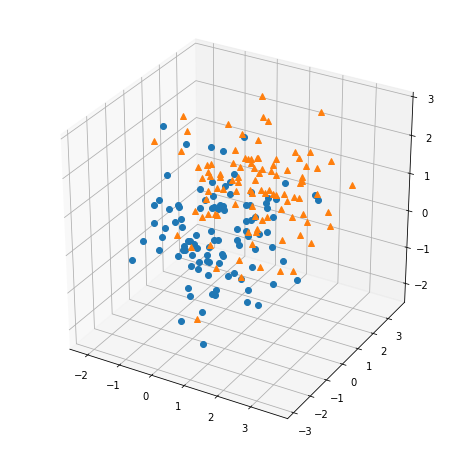

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,proj3d

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')
plt.show()

In [6]:
all_data=np.concatenate((class1,class2))


In [7]:
pca=PCA(n_components=2)

transformed_data=pca.fit_transform(all_data)

pca.components_


array([[ 0.58724297,  0.53478124,  0.60758103],
       [ 0.63936207, -0.76679337,  0.05695673]])

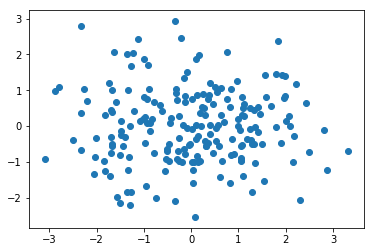

In [8]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.show()

In [9]:
X_approx=pca.inverse_transform(transformed_data)


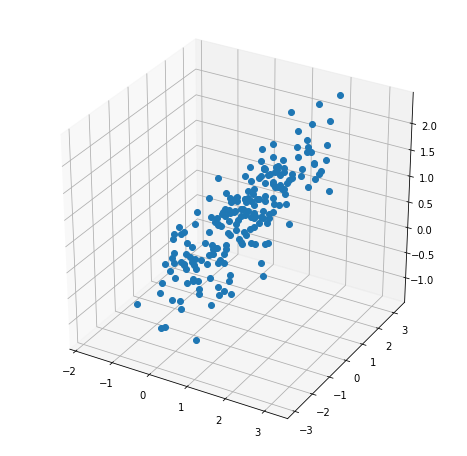

In [10]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:,0],X_approx[:,1],X_approx[:,2],'o')
plt.show()

In [11]:
cov=np.cov(all_data)
cov.shape
#the data was 200*3, but we need a 3*3 soo...

(200, 200)

In [12]:
all_data_t=all_data.T
cov=np.cov(all_data_t)
cov

array([[1.25175812, 0.15928866, 0.25707843],
       [0.15928866, 1.2330977 , 0.22425778],
       [0.25707843, 0.22425778, 1.21693803]])

In [13]:
eig_val,eig_vectors= np.linalg.eig(cov)
#values and correspong vectors
#need to sort them and sort the array2 of eigen vectors accordingly

In [14]:
eig_val_vector_pair=[]
for i in range(len(eig_val)):
    eig_vec=eig_vectors[:,i] #The ith column is the eigen vector:_
    eig_val_vector_pair.append((eig_val[i],eig_vec))

# so we have a pair of them, now just sort them

eig_val_vector_pair.sort(reverse=True)
eig_val_vector_pair


[(1.6627984808817384, array([-0.58724297, -0.53478124, -0.60758103])),
 (1.0836231240031964, array([-0.63936207,  0.76679337, -0.05695673])),
 (0.9553722458172167, array([-0.49634849, -0.35501683,  0.79221286]))]

In [15]:
pca.components_
# they might look a little different, if the pca picked the -ve direction of my direction


array([[ 0.58724297,  0.53478124,  0.60758103],
       [ 0.63936207, -0.76679337,  0.05695673]])

In [16]:
pca.explained_variance_ 
# this is it

array([1.66279848, 1.08362312])